# Vancouver Cycling Data

### Imports

In [45]:
%pip install pandas
%pip install tabula-py
%pip install matplotlib

import sys
import os
import datetime
import pandas as pd
import urllib.request
from tabula import read_pdf
from tabula import convert_into

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Fetching Data

In [46]:
# Variables 
url = "https://vancouver.ca/files/cov/Bike-lane-stats-by-month.pdf"
data_path = "data"
now = pd.to_datetime('now').date()
file_name = 'Bike-lane-stats-by-month_{}.pdf'.format(now)   

# Path
if not os.path.exists(data_path):
    os.makedirs(data_path)
resolved_file_path = os.path.join(data_path, file_name)

# Download 
print("### Downloading " + url + " and saving at " + resolved_file_path)
urllib.request.urlretrieve(url, resolved_file_path)
    
    

### Downloading https://vancouver.ca/files/cov/Bike-lane-stats-by-month.pdf and saving at data\Bike-lane-stats-by-month_2025-07-09.pdf


('data\\Bike-lane-stats-by-month_2025-07-09.pdf',
 <http.client.HTTPMessage at 0x1b2ac869f50>)

### Transforming  Data

In [47]:
# Read pdf into DataFrame
df = read_pdf(resolved_file_path, pages=2)[0]

In [48]:
# Export to CSV
csv_path = os.path.splitext(resolved_file_path)[0]+'.csv'
df.to_csv(csv_path, sep='\t')

In [49]:
df.head()

,Unnamed: 0,Total Monthly Bike Trips,"Mid-Week Daily Bicycle Trips\r(Average of all Tuesdays, Wednesdays, Thursdays, except statutory holidays)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,...,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,Burrard Bridge,Hornby Street,Dunsmuir Street,Dunsmuir Viaduct,Canada Line,Union and Hawks,Lions Gate,Science World,10th and Clark,...,Burrard Bridge,Hornby Street,Dunsmuir Street,Dunsmuir Viaduct,Canada Line,Union and Hawks,Lions Gate,Science World,10th and Clark,Point Grey Road
1,9-Aug,"130,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9-Sep,"107,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9-Oct,"70,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9-Nov,"43,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Read the CSV, skipping the first row
df = pd.read_csv(csv_path, sep='\t', skiprows=1)
df.head()



,0,Unnamed: 1,Burrard Bridge,Hornby Street,Dunsmuir Street,Dunsmuir Viaduct,Canada Line,Union and Hawks,Lions Gate,Science World,...,Burrard Bridge.1,Hornby Street.1,Dunsmuir Street.1,Dunsmuir Viaduct.1,Canada Line.1,Union and Hawks.1,Lions Gate.1,Science World.1,10th and Clark.1,Point Grey Road.1
0,1,9-Aug,"130,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9-Sep,"107,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,9-Oct,"70,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,9-Nov,"43,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9-Dec,"34,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
list(df.columns)

['0',
 'Unnamed: 1',
 'Burrard Bridge',
 'Hornby Street',
 'Dunsmuir Street',
 'Dunsmuir Viaduct',
 'Canada Line',
 'Union and Hawks',
 'Lions Gate',
 'Science World',
 '10th and Clark',
 'Point Grey Road',
 'Burrard Bridge.1',
 'Hornby Street.1',
 'Dunsmuir Street.1',
 'Dunsmuir Viaduct.1',
 'Canada Line.1',
 'Union and Hawks.1',
 'Lions Gate.1',
 'Science World.1',
 '10th and Clark.1',
 'Point Grey Road.1']

In [51]:
# Set the first row as the header and reset the DataFrame index
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.head()

,1,9-Aug,"130,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,9-Sep,"107,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,9-Oct,"70,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,9-Nov,"43,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,9-Dec,"34,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,10-Jan,"46,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Convert all columns to numeric, coercing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

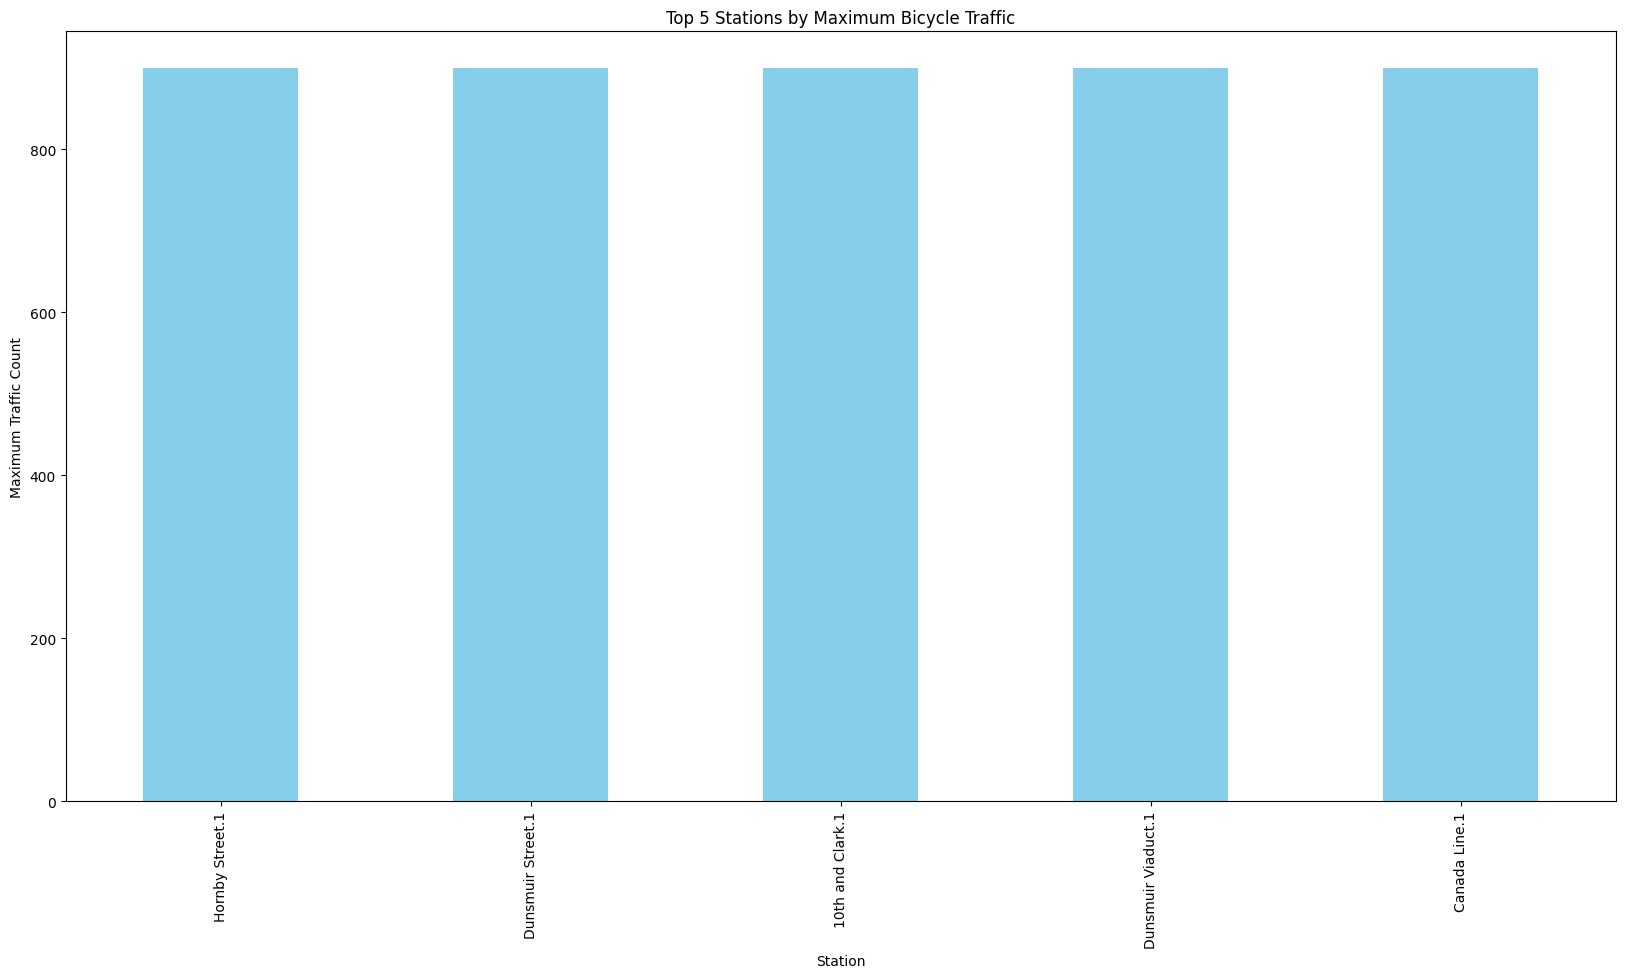

In [19]:
# Find the maximum value for each station (column), ignoring NaNs
max_per_station = df.max(skipna=True)

# Get the 5 stations with the highest maximum values
largest_stations = max_per_station.sort_values(ascending=False).head(5)

# Plot the results
largest_stations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Stations by Maximum Bicycle Traffic')
plt.ylabel('Maximum Traffic Count')
plt.xlabel('Station')
plt.show()

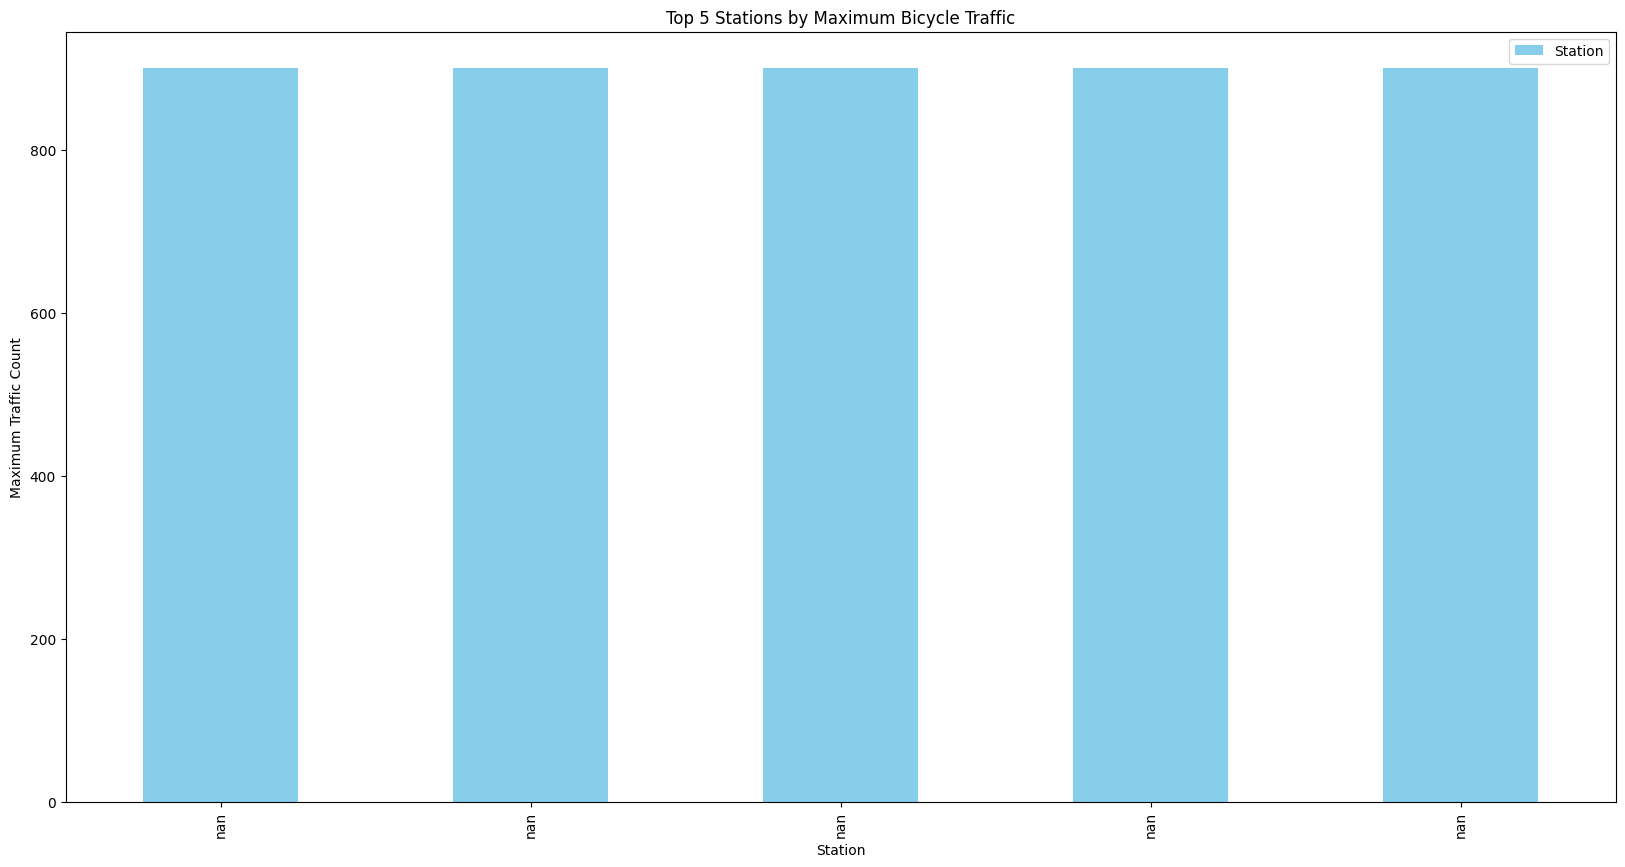

In [20]:
# Ensure the first row contains the station names (column headers)
if df.columns[0] != df.iloc[0,0]:
    df.columns = df.iloc[0]
    df = df[1:].reset_index(drop=True)

# Find the maximum value for each station (column), ignoring NaNs
max_per_station = df.max(skipna=True)

# Get the 5 stations with the highest maximum values
largest_stations = max_per_station.sort_values(ascending=False).head(5)

# Plot the results with station names as labels
largest_stations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Stations by Maximum Bicycle Traffic')
plt.ylabel('Maximum Traffic Count')
plt.xlabel('Station')
plt.legend(["Station"], loc='upper right')
plt.show()

In [33]:
df.iloc[0].describe()

count    1.0
mean     3.0
std      NaN
min      3.0
25%      3.0
50%      3.0
75%      3.0
max      3.0
Name: 0, dtype: float64

In [31]:
# Set the first row as the header and reset the DataFrame index
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.head()

,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Find the column name for Burrard Bridge from row 0, column 2
burrard_col = df.columns[2] if 'Burrard Bridge' in str(df.columns[2]) else None
if burrard_col:
    df[burrard_col] = pd.to_numeric(df[burrard_col], errors='coerce')
    df[burrard_col].plot(kind='line', color='orange')
    plt.title(f'Traffic for {burrard_col}')
    plt.ylabel('Bicycle Traffic Count')
    plt.xlabel('Time/Index')
    plt.show()
else:
    print(f"Could not find 'Burrard Bridge' in row 0, column 2. Found: {df.columns[2]}")

Could not find 'Burrard Bridge' in row 0, column 2. Found: nan
